In [12]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [86]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [22]:
p = cogsworth.pop.Population(20)
p.create_population(with_timing=False)
p

<Population - 21 evolved systems - galactic_potential=MilkyWayPotential, galaxy_model=Wagg2022>

In [23]:
# you can list out the bin_nums like this
p.bin_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [21]:
p_small = p[[4, 2]]
p_small

<Population - 2 evolved systems - galactic_potential=MilkyWayPotential, galaxy_model=Wagg2022>

We can also do usual slicing things, like getting every other binary between 2 and 10

In [24]:
p_every_other = p[2:10:2]
p_every_other.bin_nums

array([2, 4, 6, 8])

In [26]:
mask = np.repeat(False, len(p))
mask[:5] = True
print(mask)
p_masked = p[mask]
p_masked

[ True  True  True  True  True False False False False False False False
 False False False False False False False False False]


<Population - 5 evolved systems - galactic_potential=MilkyWayPotential, galaxy_model=Wagg2022>

In [28]:
p = cogsworth.pop.Population(100, final_kstar1=[13, 14])
p.create_population()

Run for 100 binaries
Ended up with 100 binaries with m1 > 0 solar masses
[3e-02s] Sample initial binaries
[0.5s] Evolve binaries (run COSMIC)


114it [00:00, 223.17it/s]                                                               


[0.9s] Get orbits (run gala)
Overall: 1.5s


Now to get the classes for each source we just need to access ``p.classes``

In [29]:
p.classes

,dco,co-1,co-2,xrb,walkaway-t-1,walkaway-t-2,runaway-t-1,runaway-t-2,walkaway-o-1,walkaway-o-2,runaway-o-1,runaway-o-2,widow-1,widow-2,stellar-merger-co-1,stellar-merger-co-2,pisn-1,pisn-2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


This gives us a huge table of booleans, which indicate whether a source is a part of a particular class. Each source can therefore have multiple classes (e.g. all `dco`s will also have `co-1` and `co-2`).

We can summarise this as totals by running the following

In [30]:
p.classes.sum()

dco                     1
co-1                   14
co-2                   10
xrb                     0
walkaway-t-1            0
walkaway-t-2            0
runaway-t-1             0
runaway-t-2             0
walkaway-o-1            0
walkaway-o-2            0
runaway-o-1             0
runaway-o-2             0
widow-1                 0
widow-2                 0
stellar-merger-co-1     7
stellar-merger-co-2    14
pisn-1                  0
pisn-2                  0
dtype: int64

In [37]:
cogsworth.classify.list_classes()

Any class with a suffix '-1' or '-2' applies to only the primary or secondary
Available classes
-----------------
Theory Runaway (runaway-t)
    Any star from a disrupted binary that has an instantaneous velocity > 30 km/s in the frame of the binary

Observation runaway (runaway-o)
    Any star from a disrupted binary that is moving with a Galactocentric velocity > 30km/s relative to the local circular velocity at its location

Theory Runaway (walkaway-t)
    Any star from a disrupted binary that has an instantaneous velocity < 30 km/s in the frame of the binary

Observation walkaway (walkaway-o)
    Any star from a disrupted binary that is moving with a Galactocentric velocity < 30km/s relative to the local circular velocity at its location

Widowed Star (widow)
    Any star, or binary containing a star, that is/was a companion to a compact object

X-ray binary (xrb)
    Any binary with a star that is a companion to a compact object

Compact object (co)
    Any compact object or binar

Okay as an example, let's select just the sources that have a primary that is a compact object. Each column of the classes table is a boolean array that we can apply as a mask to the population.

In [32]:
p.classes["co-1"].values

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

In [33]:
co1_pop = p[p.classes["co-1"]]

Let's check out the `final_bpp` table to confirm that we've selected the right things.

In [34]:
co1_pop.final_bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
5,9667.275145,29.036790,14.138516,14.0,14.0,87896.374467,459632.665739,0.085933,3.464053e-09,2.341549e-09,10.0,9663.491386,9662.261450,1.000000e+10,1.000000e+10,29.036790,14.138516,0.000123,0.000060,29.430389,14.739243,1.000000e-10,1.000000e-10,1652.389313,2368.016708,0.000123,0.000060,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.850814e+09,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,3.783759,5.013695,0.0,0.0,5,0.004928
21,3104.404550,1.487568,1.277584,13.0,13.0,-1.000000,-1.000000,-1.000000,1.000000e-04,1.000000e-04,10.0,3088.872989,3080.820077,1.000000e+10,1.000000e+10,1.487568,1.277584,0.000014,0.000014,13.612605,10.694125,2.735202e-09,2.483008e-09,11206.059798,10938.307615,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.857021e+07,4.720286e+06,3.652676e+11,2.213095e+12,0.0,0.0,0.0,0.0,15.531560,23.584472,0.0,0.0,21,0.015317
22,9188.303540,1.277584,1.011250,13.0,11.0,-1.000000,-1.000000,-1.000000,1.000000e-04,1.000000e-04,10.0,9160.543605,9066.413548,1.000000e+10,1.000000e+10,1.277584,1.011250,0.000014,0.007931,2.942339,1.011250,2.808461e-10,3.736666e-05,6343.408467,5090.031034,0.000014,0.007931,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.530969e+06,7.485849e-06,2.817606e+11,0.000000e+00,0.0,0.0,0.0,0.0,27.759935,121.889992,0.0,0.0,22,0.009889
23,2518.537888,1.277584,5.228011,13.0,14.0,-1.000000,-1.000000,-1.000000,1.000000e-04,1.000000e-04,10.0,2503.597801,2498.807404,1.000000e+10,1.000000e+10,1.277584,5.228011,0.000014,0.000022,3.575925,21.435806,3.759947e-09,1.000000e-10,12133.917002,3894.201805,0.000014,0.000022,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.945668e+07,2.000000e+08,4.123950e+11,0.000000e+00,0.0,0.0,0.0,0.0,14.940087,19.730484,0.0,0.0,23,0.010072
26,6070.621236,1.480668,3.423964,13.0,14.0,-1.000000,-1.000000,-1.000000,1.000000e-04,1.000000e-04,10.0,6060.406968,6056.511639,1.000000e+10,1.000000e+10,1.480668,3.423964,0.000014,0.000015,4.321078,8.157207,7.083259e-10,1.000000e-10,7993.994901,4811.961088,0.000014,0.000015,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,5.058284e+06,2.000000e+08,6.816546e+11,0.000000e+00,0.0,0.0,0.0,0.0,10.214268,14.109597,0.0,0.0,26,0.016266
35,9012.210336,15.842640,9.849461,14.0,14.0,-1.000000,-1.000000,-1.000000,1.000000e-04,1.000000e-04,10.0,9007.587194,9002.195263,1.000000e+10,1.000000e+10,15.842640,9.849461,0.000067,0.000042,15.928856,25.224957,1.000000e-10,1.000000e-10,2237.035668,2837.137972,0.000067,0.000042,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.431475e+11,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,4.623142,10.015073,0.0,0.0,35,0.005900
36,10692.547917,16.951750,12.906036,14.0,14.0,-1.000000,-1.000000,-1.000000,1.000000e-04,1.000000e-04,10.0,10688.002730,10686.902847,1.000000e+10,1.000000e+10,16.951750,12.906036,0.000072,0.000055,17.405924,14.165501,1.000000e-10,1.000000e-10,2162.615989,2478.507545,0.000072,0.000055,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.671821e+10,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,4.545187,5.645070,0.0,0.0,36,0.005622
53,7627.278980,5.457267,1.096995,14.0,11.0,-1.000000,-1.000000,-1.000000,1.000000e-04,1.000000e-04,10.0,7621.818764,7538.827034,1.000000e+10,1.000000e+10,5.457267,1.096995,0.000023,0.006945,9.950924,1.096995,1.000000e-10,6.111565e-05,3811.527591,6151.202975,0.000023,0.006945,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,8.998813e-06,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,5.460215,88.451945,0.0,0.0,53,0.014531
60,7255.480391,13.435945,6.735413,14.0,14.0,-1.000000,-1.000000,-1.000000,1.000000e-04,1.000000e-04,10.0,7249.480001,7244.041319,1.000000e+10,1.000000e+10,13.435945

You can see that the `kstar_1` column is always either 13 (neutron star) or 14 (black hole), nice!

In [38]:
custom_mask = p.disrupted & p.classes["co-2"]
custom_pop = p[custom_mask]
custom_pop.final_bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
10,7771.682472,1.293642,1.260782,12.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,7713.168324,7701.163261,1.000000e+10,1.000000e+10,1.293642,1.260782,0.003376,0.000014,1.292549,7.992410,5.884782e-05,3.938639e-10,8739.558343,6903.067733,0.003376,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.350236e+07,2.186097e+06,0.000000e+00,8.410143e+11,0.0,0.0,0.0,0.0,58.514147,70.519210,0.0,0.0,10,0.009365
21,3104.404550,1.487568,1.277584,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,3088.872989,3080.820077,1.000000e+10,1.000000e+10,1.487568,1.277584,0.000014,0.000014,13.612605,10.694125,2.735202e-09,2.483008e-09,11206.059798,10938.307615,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.857021e+07,4.720286e+06,3.652676e+11,2.213095e+12,0.0,0.0,0.0,0.0,15.531560,23.584472,0.0,0.0,21,0.015317
23,2518.537888,1.277584,5.228011,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,2503.597801,2498.807404,1.000000e+10,1.000000e+10,1.277584,5.228011,0.000014,0.000022,3.575925,21.435806,3.759947e-09,1.000000e-10,12133.917002,3894.201805,0.000014,0.000022,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.945668e+07,2.000000e+08,4.123950e+11,0.000000e+00,0.0,0.0,0.0,0.0,14.940087,19.730484,0.0,0.0,23,0.010072
26,6070.621236,1.480668,3.423964,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,6060.406968,6056.511639,1.000000e+10,1.000000e+10,1.480668,3.423964,0.000014,0.000015,4.321078,8.157207,7.083259e-10,1.000000e-10,7993.994901,4811.961088,0.000014,0.000015,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,5.058284e+06,2.000000e+08,6.816546e+11,0.000000e+00,0.0,0.0,0.0,0.0,10.214268,14.109597,0.0,0.0,26,0.016266
35,9012.210336,15.842640,9.849461,14.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,9007.587194,9002.195263,1.000000e+10,1.000000e+10,15.842640,9.849461,0.000067,0.000042,15.928856,25.224957,1.000000e-10,1.000000e-10,2237.035668,2837.137972,0.000067,0.000042,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.431475e+11,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,4.623142,10.015073,0.0,0.0,35,0.005900
36,10692.547917,16.951750,12.906036,14.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10688.002730,10686.902847,1.000000e+10,1.000000e+10,16.951750,12.906036,0.000072,0.000055,17.405924,14.165501,1.000000e-10,1.000000e-10,2162.615989,2478.507545,0.000072,0.000055,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.671821e+10,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,4.545187,5.645070,0.0,0.0,36,0.005622
60,7255.480391,13.435945,6.735413,14.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,7249.480001,7244.041319,1.000000e+10,1.000000e+10,13.435945,6.735413,0.000057,0.000029,14.305117,20.471469,1.000000e-10,1.000000e-10,2429.140164,3430.872387,0.000057,0.000029,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.687831e+11,2.000000e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,6.000390,11.439072,0.0,0.0,60,0.003137
65,10749.732206,1.824711,9.823059,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10738.019330,10732.965495,1.000000e+10,1.000000e+10,1.824711,9.823059,0.000014,0.000042,5.191078,24.679260,2.595265e-10,1.000000e-10,6219.436355,2840.948185,0.000014,0.000042,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.085433e+05,2.000000e+08,1.134686e+12,0.000000e+00,0.0,0.0,0.0,0.0,11.712875,16.766710,0.0,0.0,65,0.005218
84,10192.987971,1.277584,1.277584,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10165.553479,10155.689993,1.000000e+10,1.000000e+10,1.277584,1.277584,0.000014,0.000014,10.136937,8.563774,2.280598e-10,2.285030e-10,6021.681569,6024.605071,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.110352e+07,1.263886e+07,3.036452e+10,7.474986e+10,0.0,0.0,0.0,0.0,27.43449

Okay let's be more specific, we also want it to be specifically a black hole of at least 7 solar masses - you can just keep stringing together the conditions!

In [39]:
custom_mask = p.disrupted & p.classes["co-2"]\
    & (p.final_bpp["kstar_2"] == 14) & (p.final_bpp["mass_2"] > 7)
custom_pop = p[custom_mask]
custom_pop.final_bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
35,9012.210336,15.842640,9.849461,14.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,9007.587194,9002.195263,1.000000e+10,1.000000e+10,15.842640,9.849461,0.000067,0.000042,15.928856,25.224957,1.000000e-10,1.000000e-10,2237.035668,2837.137972,0.000067,0.000042,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.431475e+11,200000000.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,4.623142,10.015073,0.0,0.0,35,0.005900
36,10692.547917,16.951750,12.906036,14.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10688.002730,10686.902847,1.000000e+10,1.000000e+10,16.951750,12.906036,0.000072,0.000055,17.405924,14.165501,1.000000e-10,1.000000e-10,2162.615989,2478.507545,0.000072,0.000055,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.671821e+10,200000000.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,4.545187,5.645070,0.0,0.0,36,0.005622
65,10749.732206,1.824711,9.823059,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10738.019330,10732.965495,1.000000e+10,1.000000e+10,1.824711,9.823059,0.000014,0.000042,5.191078,24.679260,2.595265e-10,1.000000e-10,6219.436355,2840.948185,0.000014,0.000042,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.085433e+05,200000000.0,1.134686e+12,0.0,0.0,0.0,0.0,0.0,11.712875,16.766710,0.0,0.0,65,0.005218


In [52]:
# get every row of evolutionary history matching condition
rev_mr_rows = p.bpp[(p.bpp["mass_2"] > p.bpp["mass_1"])
                    & (p.bpp["kstar_1"] < 7)
                    & (p.bpp["kstar_2"] < 7)]

# get unique binary numbers matching mask
rev_mr_bin_nums = rev_mr_rows["bin_num"].unique()

# mask the population
custom_pop = p[rev_mr_bin_nums]

Let's look at the evolution history of the first binary in this bunch to confirm we masked the right things

In [53]:
custom_pop.bpp.loc[custom_pop.bin_nums[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
2,0.000000,3.534755,2.931202,1.0,1.0,28.682423,7.001313,0.163846,0.206366,0.202641,1.0,0.000000,0.000000,2.292375e+02,3.676284e+02,0.000000,0.000000,1.956094,1.763321,3.534755,2.931202,169.421156,85.229223,14956.042969,13266.337654,0.000000,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.855704e+03,7.748170e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2
2,229.292030,3.534079,2.931107,2.0,1.0,28.753335,7.027712,0.164521,0.478314,0.298705,2.0,229.345698,229.298805,2.293457e+02,3.676591e+02,0.526460,0.000000,4.541217,2.603664,3.534079,2.931107,448.709140,123.083527,12522.029534,11968.153433,0.116857,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.396380e+03,3.541463e+03,0.0,0.0,0.0,0.0,0.0,0.0,-0.053668,-0.006775,0.0,0.0,2
2,229.996223,3.533976,2.931118,2.0,1.0,24.031652,5.369826,0.000000,1.000833,0.299118,3.0,230.066485,230.000806,2.293622e+02,3.676556e+02,0.532519,0.000000,9.505547,2.608243,3.533976,2.931118,343.997645,123.267212,8098.785797,11962.100799,0.118282,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.273641e+02,4.273641e+02,0.0,0.0,0.0,0.0,0.0,0.0,-0.070262,-0.004583,0.0,0.0,2
2,230.584779,2.098788,4.366226,3.0,1.0,28.232308,6.837652,0.000000,2.325611,0.223345,2.0,233.999004,58.191828,2.326895e+02,1.380264e+02,0.533273,0.000000,20.853964,2.796587,3.513422,4.366226,269.938250,456.213440,5146.256248,16023.133193,0.118458,0.000000,7.827577e-01,1.000000e-10,1.347808e+01,1.000000e-10,2.377168e+02,8.821614e+03,0.0,0.0,0.0,0.0,0.0,0.0,-3.414225,172.392950,0.0,0.0,2
2,231.504590,0.712915,5.752006,4.0,1.0,132.523357,69.539120,0.000000,2.149195,0.041293,2.0,234.918815,24.574255,2.326895e+02,7.445742e+01,0.548173,0.000000,62.659849,3.069484,3.513422,5.752006,1012.449629,1115.197625,4131.600246,19123.831176,0.121899,0.000000,1.647422e-01,1.000000e-10,6.253795e+01,1.000000e-10,2.912008e+01,8.823934e+03,0.0,0.0,0.0,0.0,0.0,0.0,-3.414225,206.930334,0.0,0.0,2
2,232.989902,0.569318,5.895447,4.0,1.0,186.376220,115.979576,0.000000,0.976560,0.028962,4.0,236.404128,24.276224,2.326895e+02,7.064718e+01,0.558079,0.000000,37.253575,3.135717,3.513422,5.895447,704.980456,1224.694135,4894.743072,19369.038278,0.126026,0.000000,2.620411e-06,1.000000e-10,4.587817e+00,1.000000e-10,1.626177e+01,8.648391e+03,0.0,0.0,0.0,0.0,0.0,0.0,-3.414225,208.713679,0.0,0.0,2
2,234.128557,0.565673,5.898115,7.0,1.0,186.215509,115.838353,0.000000,0.003397,0.029248,2.0,5.725125,25.391404,9.737783e+01,7.057936e+01,0.000000,0.000000,0.129205,3.166888,0.565673,5.898115,30.750784,1241.154417,37983.418517,19337.916989,0.000000,0.000000,5.656733e-01,1.000000e-10,1.292050e-01,1.000000e-10,6.263483e+02,8.479976e+03,0.0,0.0,0.0,0.0,0.0,0.0,228.403432,208.737153,0.0,0.0,2
2,279.379928,0.565156,5.888333,7.0,2.0,186.512665,116.208361,0.000000,0.004053,0.056226,2.0,51.063581,70.828642,9.765792e+01,7.082861e+01,0.000000,1.052620,0.154440,6.097068,0.565156,5.888333,43.321865,2914.913169,37850.013011,17253.035459,0.000000,0.212709,5.651559e-01,1.000000e-10,1.544403e-01,1.000000e-10,4.378681e+02,2.747518e+03,0.0,0.0,0.0,0.0,0.0,0.0,228.316347,208.551287,0.0,0.0,2
2,279.652252,0.565152,5.887920,7.0,3.0,186.524450,116.223121,0.000000,0.004056,0.469285,2.0,51.336922,71.111537,9.765986e+01,7.083915e+01,0.000000,1.073647,0.154561,50.891760,0.565152,5.887920,43.428164,1917.498408,37858.438754,5378.109376,0.000000,0.215885,5.651524e-01,2.407735e+00,1.545609e-01,3.294373e+01,4.493725e+02,2.970749e+01,0.0,0.0,0.0,0.0,0.0,0.0,228.315330,208.540715,0.0,0.0,2
2,279.719781,0.565153,5.887537,7.0,3.0,136.067531,72.415833,0.000000,0.005560,1.001047,3.0,51.404360,71.179066,9.765969e+01,7.083915e+01,0.000000,1.075056,0.154591,79.191745,0.56515

In [49]:
big_kick_nums = p.kick_info[p.kick_info["natal_kick"] > 500]["bin_num"].unique().astype(int)
p_big_kick = p[big_kick_nums]
p_big_kick.kick_info

,star,disrupted,natal_kick,phi,theta,mean_anomaly,delta_vsysx_1,delta_vsysy_1,delta_vsysz_1,vsys_1_total,delta_vsysx_2,delta_vsysy_2,delta_vsysz_2,vsys_2_total,delta_theta_total,omega,randomseed,bin_num
10,2.0,1.0,501.250522,-24.507577,326.241589,0.0,12.578777,-46.341322,93.373669,104.997076,-200.060337,-418.521354,20.663016,464.339555,0.0,0.0,-4.873864e+08,10.0
10,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,10.0
49,2.0,0.0,682.426705,16.626416,78.353929,0.0,-282.404800,-291.727862,548.496664,682.426705,0.000000,-0.000000,0.000000,0.000000,0.0,0.0,-1.972653e+09,49.0
49,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,49.0
58,2.0,0.0,618.913177,28.489444,165.079815,0.0,156.781699,241.750984,-547.749469,618.913177,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-2.049126e+09,58.0
58,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,58.0
65,1.0,1.0,672.215690,-68.507442,332.812786,0.0,142.256507,-40.411289,92.617532,174.493533,33.748583,34.364061,4.938487,48.417396,0.0,0.0,-8.530364e+08,65.0
65,2.0,1.0,267.862972,41.757771,34.497162,0.0,0.000000,0.000000,0.000000,174.493533,147.022643,101.035139,199.816954,304.854015,0.0,0.0,1.542946e+09,65.0
72,2.0,0.0,583.950286,78.662973,282.180598,0.0,-388.806578,-311.155517,304.974795,583.950286,-0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1.391142e+09,72.0
72,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,72.0


In [75]:
p_init_mask = p[(p.initC["mass_1"] > 30) & (p.initial_galaxy.rho > 5 * u.kpc)]
p_init_mask

<Population - 4 evolved systems - galactic_potential=MilkyWayPotential, galaxy_model=Wagg2022>

In [78]:
p = cogsworth.pop.Population(1000, final_kstar1=[13, 14])
p.create_population()

Run for 1000 binaries
Ended up with 1004 binaries with m1 > 0 solar masses
[6e-02s] Sample initial binaries
[3.7s] Evolve binaries (run COSMIC)


1136it [00:05, 207.97it/s]                                                              


[7.7s] Get orbits (run gala)
Overall: 11.6s


In [88]:
# get every system that had either a primary or secondary supernova
kicked = np.isin(p.bin_nums, p.bpp[(p.bpp["evol_type"] == 15) | (p.bpp["evol_type"] == 16)]["bin_num"].unique())

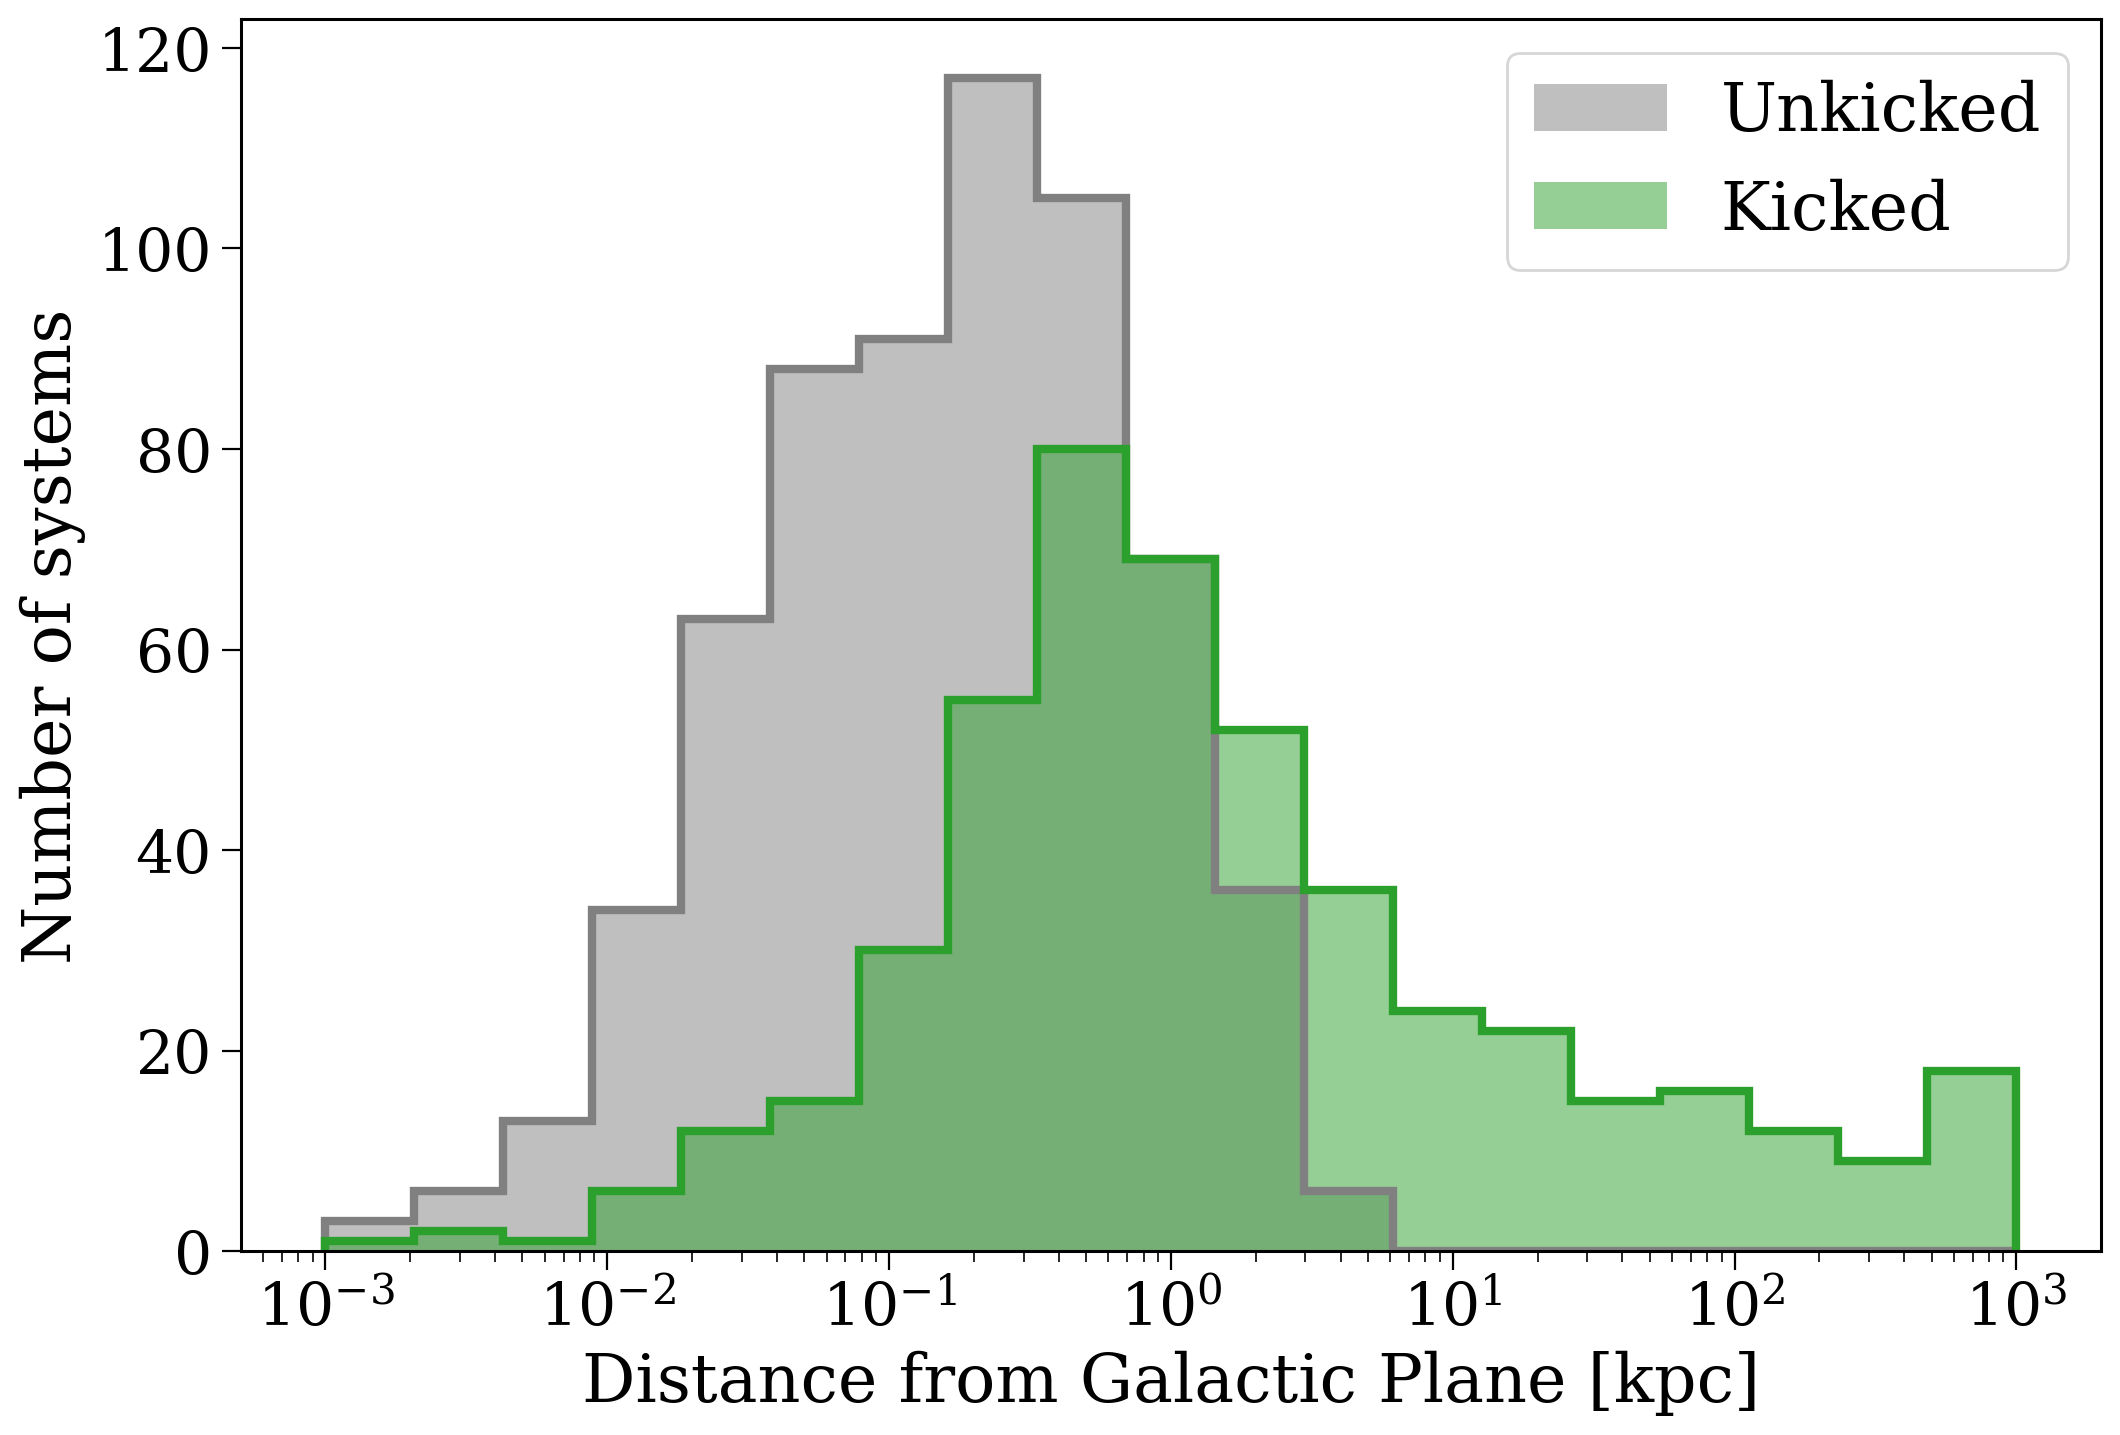

In [89]:
# split the population
p_kicked = p[kicked]
p_unkicked = p[~kicked]

fig, ax = plt.subplots()

# plot histograms for each
for pop, label, colour in zip([p_unkicked, p_kicked], ["Unkicked", "Kicked"], ["grey", "C2"]):
    ax.hist(abs(pop.final_pos[:, 2].value), bins=np.geomspace(1e-3, 1e3, 20),
            histtype="step", linewidth=3, color=colour)
    ax.hist(abs(pop.final_pos[:, 2].value), bins=np.geomspace(1e-3, 1e3, 20),
            alpha=0.5, color=colour, label=label)

ax.set(xscale="log", xlabel="Distance from Galactic Plane [kpc]", ylabel="Number of systems")
ax.legend()
plt.show()